**Importing necessary libraries**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [81]:
data = pd.read_csv('Vehicle_Performance.csv')

In [82]:
data.shape

(398, 9)

In [83]:
data.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Type casting necessary attributes**

In [85]:
data['origin'].unique()

array([1, 3, 2], dtype=int64)

In [86]:
# Origin contains only 3 unique values representing 3 countries, so better type cast it to an object.
data['origin'] = data['origin'].astype('object')

In [87]:
data['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [88]:
# Cylinders also contain only 4 unique values, so its better to type cast it as an object.
data['cylinders'] = data['cylinders'].astype('object')

In [89]:
data['horsepower'].head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [90]:
# Horsepower is considered an object type, so there may be a chance of string values in the column.
try:
    data['horsepower'] = data['horsepower'].astype('int')
except:
    anomaly = []
    for i in data['horsepower']:
        if i.isdigit():
            pass
        else:
            if i not in anomaly:
                anomaly.append(i)
    print(anomaly)

['?']


In [91]:
# Replacing ? by Nan values for easy imputation.
data['horsepower'] = [i.replace('?','-1') for i in data['horsepower']]
data['horsepower'] = data['horsepower'].astype('int')
data['horsepower'].replace(-1,data['horsepower'].mean(), inplace = True)

In [92]:
len(data['name'].unique())

305

In [93]:
# Since the name has more unique values than half the shape of dataset, so its better to remove name from the data.
data.drop(columns = 'name', inplace = True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    object 
 1   cylinders            398 non-null    object 
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 25.0+ KB


**EDA**

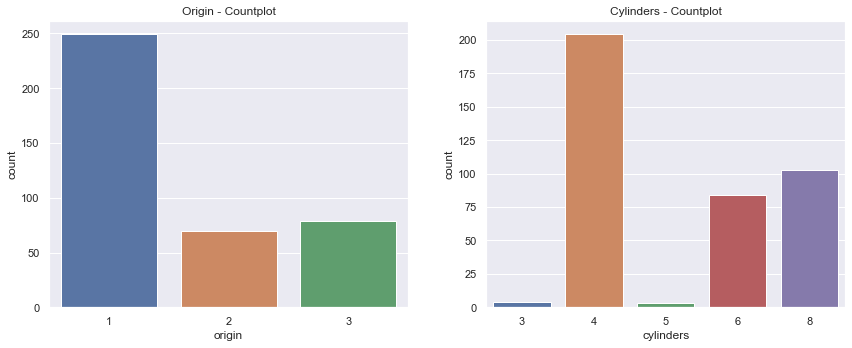

In [95]:
fig,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
sns.countplot(data = data, x = 'origin', ax = ax1)
ax1.set_title('Origin - Countplot')

sns.countplot(data = data, x = 'cylinders', ax = ax2)
ax2.set_title('Cylinders - Countplot')
plt.tight_layout(w_pad = 3)
plt.show()

- Most cars in the dataset are from country 1 
- 3 and 5 are the least occuring count of cylinders 

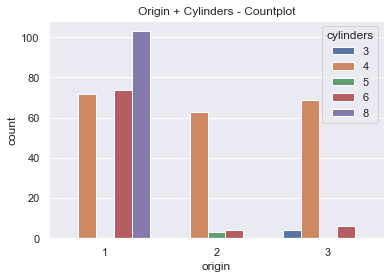

In [96]:
sns.countplot(data = data, x = 'origin', hue = 'cylinders')
plt.title('Origin + Cylinders - Countplot')
plt.show()

- Cars with five cylinders are found only in Country 2, while three cylinders are found only in Country 3.
- Most of the cars in the dataset have 4 cylinders as it is almost proportional in 3 countries.

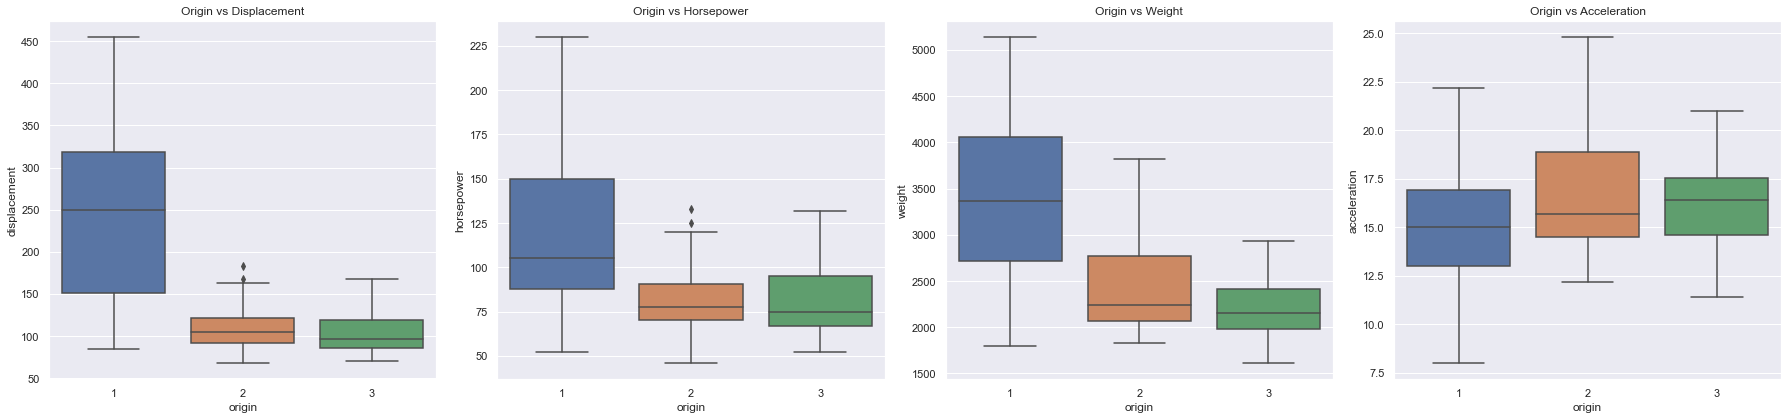

In [97]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (25,6))
sns.boxplot(data = data, x = 'origin', y = 'displacement', ax = ax1)
ax1.set_title('Origin vs Displacement')

sns.boxplot(data = data, x = 'origin', y = 'horsepower', ax = ax2)
ax2.set_title('Origin vs Horsepower')

sns.boxplot(data = data, x = 'origin', y = 'weight', ax = ax3)
ax3.set_title('Origin vs Weight')

sns.boxplot(data = data, x = 'origin', y = 'acceleration', ax = ax4)
ax4.set_title('Origin vs Acceleration')

plt.tight_layout()
plt.show()

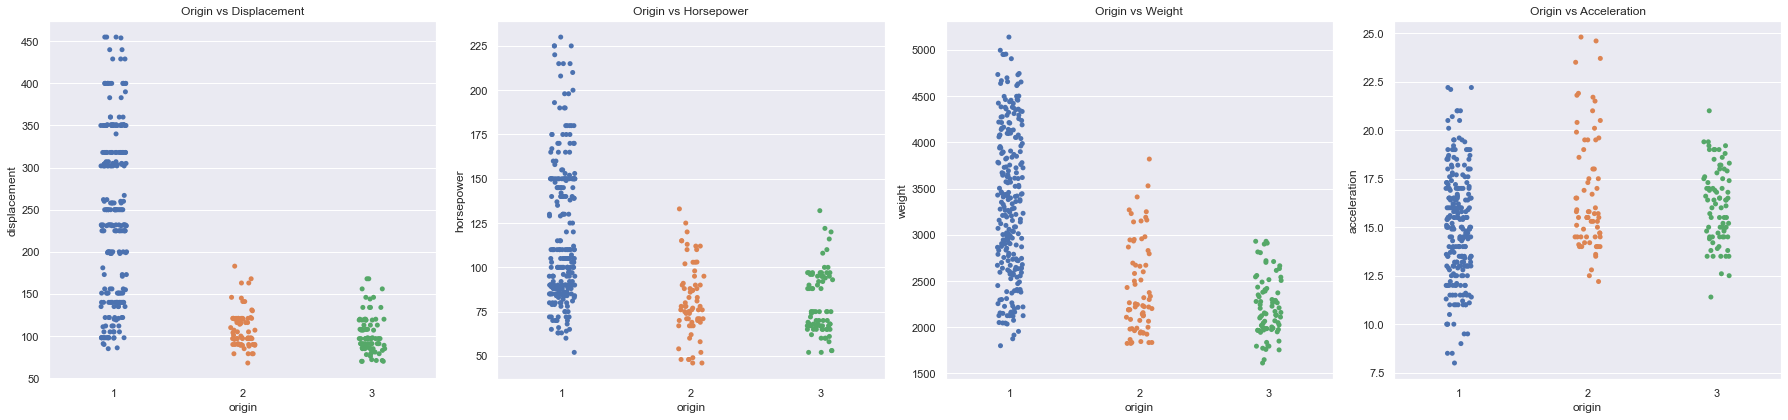

In [98]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (25,6))
sns.stripplot(data = data, x = 'origin', y = 'displacement', ax = ax1)
ax1.set_title('Origin vs Displacement')

sns.stripplot(data = data, x = 'origin', y = 'horsepower', ax = ax2)
ax2.set_title('Origin vs Horsepower')

sns.stripplot(data = data, x = 'origin', y = 'weight', ax = ax3)
ax3.set_title('Origin vs Weight')

sns.stripplot(data = data, x = 'origin', y = 'acceleration', ax = ax4)
ax4.set_title('Origin vs Acceleration')

plt.tight_layout()
plt.show()

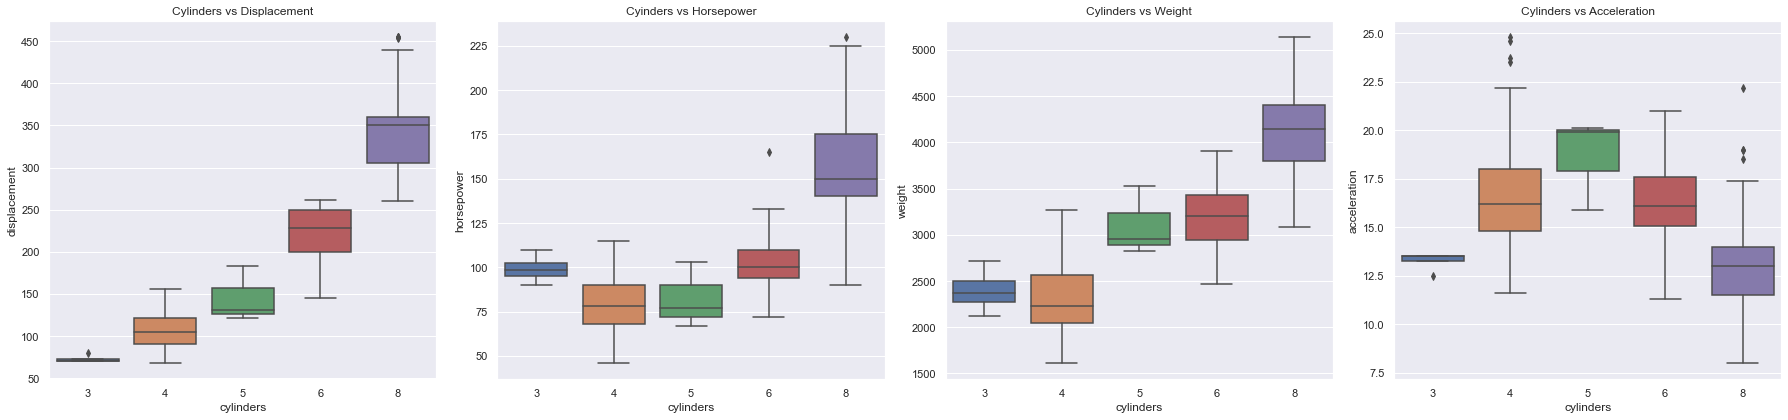

In [99]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (25,6))
sns.boxplot(data = data, x = 'cylinders', y = 'displacement', ax = ax1)
ax1.set_title('Cylinders vs Displacement')

sns.boxplot(data = data, x = 'cylinders', y = 'horsepower', ax = ax2)
ax2.set_title('Cyinders vs Horsepower')

sns.boxplot(data = data, x = 'cylinders', y = 'weight', ax = ax3)
ax3.set_title('Cylinders vs Weight')

sns.boxplot(data = data, x = 'cylinders', y = 'acceleration', ax = ax4)
ax4.set_title('Cylinders vs Acceleration')

plt.tight_layout()
plt.show()

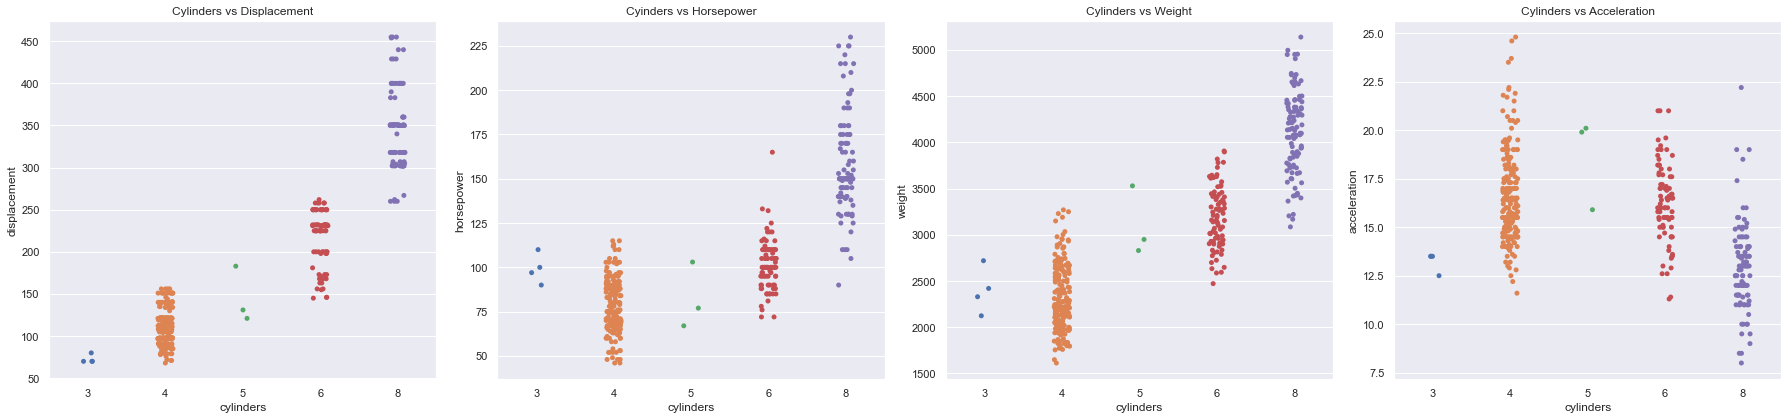

In [100]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows = 1, ncols = 4, figsize = (25,6))
sns.stripplot(data = data, x = 'cylinders', y = 'displacement', ax = ax1)
ax1.set_title('Cylinders vs Displacement')

sns.stripplot(data = data, x = 'cylinders', y = 'horsepower', ax = ax2)
ax2.set_title('Cyinders vs Horsepower')

sns.stripplot(data = data, x = 'cylinders', y = 'weight', ax = ax3)
ax3.set_title('Cylinders vs Weight')

sns.stripplot(data = data, x = 'cylinders', y = 'acceleration', ax = ax4)
ax4.set_title('Cylinders vs Acceleration')

plt.tight_layout()
plt.show()

As the number of cylinders increases all other features of the vehicle also increases

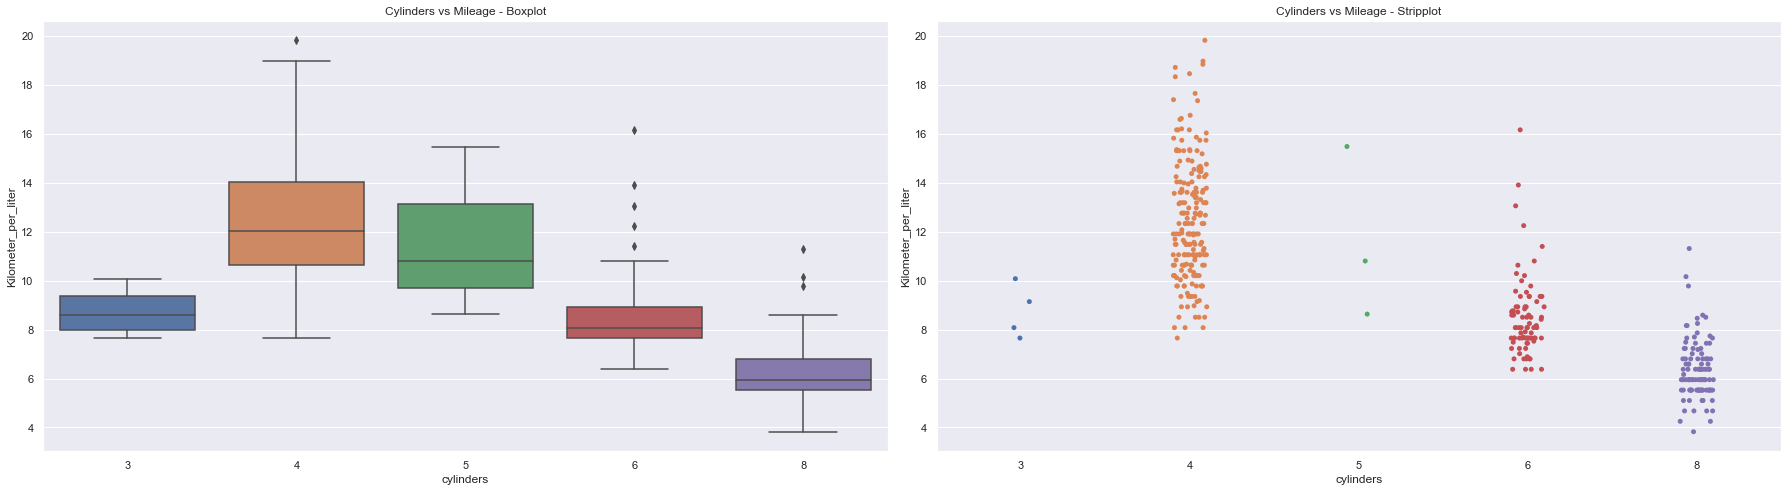

In [101]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (25,7))
sns.boxplot(data = data, x = 'cylinders', y = 'Kilometer_per_liter', ax = ax1)
ax1.set_title('Cylinders vs Mileage - Boxplot')

sns.stripplot(data = data, x = 'cylinders', y = 'Kilometer_per_liter', ax = ax2)
ax2.set_title('Cylinders vs Mileage - Stripplot')

plt.tight_layout()
plt.show()

Increase in cylinders reduces the mileage. The vehicle performance is maximum for 4 cylinders.

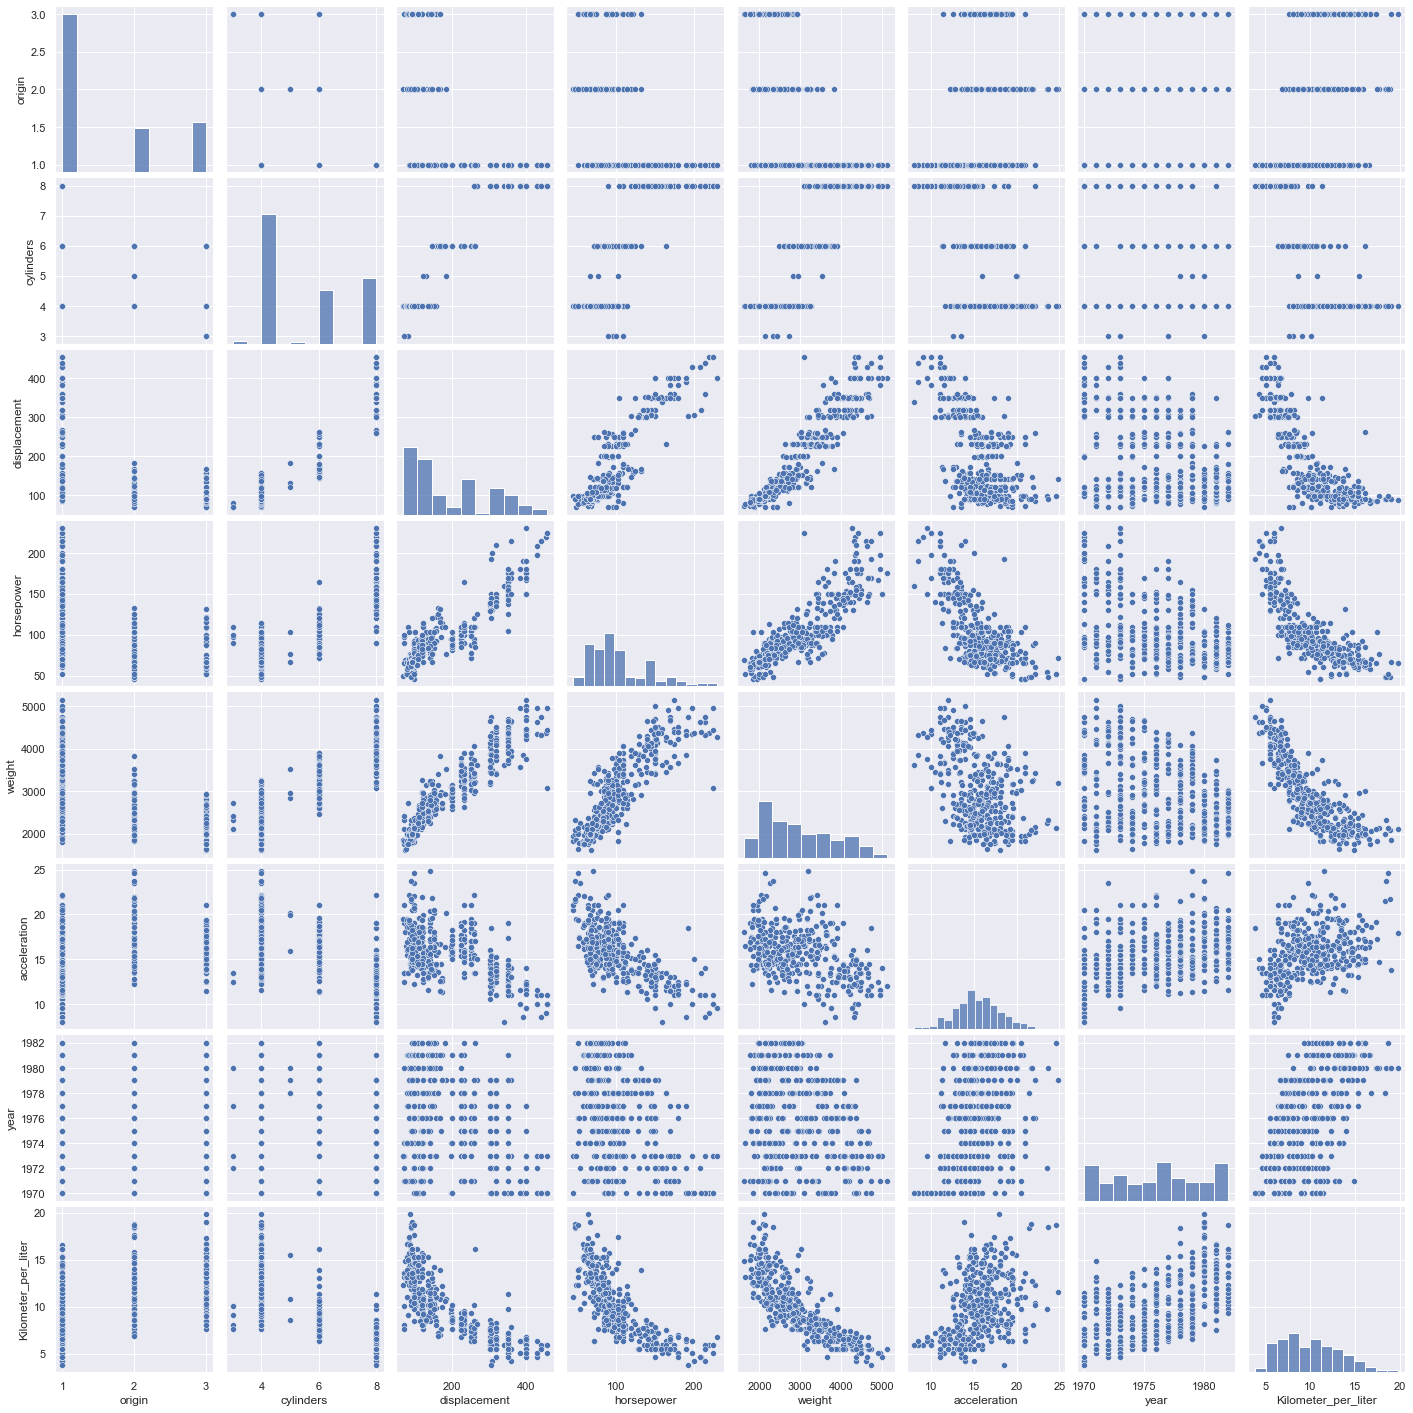

In [102]:
sns.pairplot(data)

<AxesSubplot:>

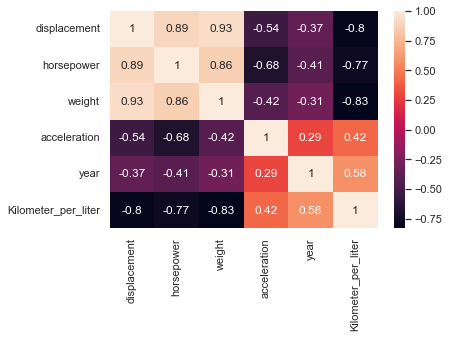

In [103]:
sns.heatmap(data = data.corr(), annot = True)

There is a significant correlation between the dependent nd independent variables.

**Train Test Split**

In [104]:
x = data.drop(columns = 'Kilometer_per_liter')
y = data['Kilometer_per_liter']

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 48)

In [106]:
def dshape(x):
    return x.shape

In [107]:
dshape(x_train)

(298, 7)

In [108]:
dshape(x_test)

(100, 7)

In [109]:
dshape(y_train)

(298,)

In [110]:
dshape(y_test)

(100,)

**Encoding Categorical Variables**

In [114]:
for i in data[['origin','cylinders']].columns:
    le = LabelEncoder()
    x_train[i] = le.fit_transform(x_train[i])
    x_test[i] = le.transform(x_test[i])

**SGD**

In [143]:
loss = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
max_iter = [10, 50, 100]
eta0 = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 10, 100] 
param_distributions = dict(loss = loss, penalty = penalty, alpha = alpha, learning_rate = learning_rate, max_iter = max_iter, eta0 = eta0)

initial_model = SGDRegressor() 
random = RandomizedSearchCV(estimator = initial_model, param_distributions = param_distributions,n_iter = 1000)

random_result = random.fit(x_train, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_) 

Best Score:  0.6897394897788949
Best Params:  {'penalty': 'l2', 'max_iter': 100, 'loss': 'huber', 'learning_rate': 'adaptive', 'eta0': 0.5, 'alpha': 10}


In [144]:
model = SGDRegressor(penalty= 'l2', max_iter = 100, loss = 'huber', learning_rate = 'adaptive', eta0 = 0.5, alpha = 10)
model.fit(x_train,y_train)

SGDRegressor(alpha=10, eta0=0.5, learning_rate='adaptive', loss='huber',
             max_iter=100)

In [147]:
y_train_predict = model.predict(x_train)
y_test_predict = model.predict(x_test)
print(f'Train mean squared rrror : {np.sqrt(mean_squared_error(y_train,y_train_predict))}')
print(f'Test mean squared error : {np.sqrt(mean_squared_error(y_test,y_test_predict))}')

Train mean squared rrror : 41.20318165415267
Test mean squared error : 41.45906252743928


There is no significant difference between the train RMSE and test RMSE which reduces the chance of overfitting.